In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from datetime import datetime
from citipy import citipy

In [10]:
#import weather api key
from config import weather_api_key

In [11]:
#url for pulling in weather api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
#create a set of random latitude and longitude combos

lats = np.random.uniform(low =-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [14]:
#boston = "Boston"


#city_url = url + "&q=" + boston

#city_weather = requests.get(city_url)
#city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 63.21,
  'feels_like': 60.78,
  'temp_min': 58.37,
  'temp_max': 66.45,
  'pressure': 1025,
  'humidity': 33},
 'visibility': 10000,
 'wind': {'speed': 21, 'deg': 0, 'gust': 0},
 'clouds': {'all': 40},
 'dt': 1650660661,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650621131,
  'sunset': 1650670375},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
#create list for holding the cities

cities = []

#identify the nearest city for each lat and long combo

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

594

In [17]:
#create an empy list to hold the weather data

city_data = []

#print the beginning of the logging 
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through the cities in our list

for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record , and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city}")
    
    #add 1 to the record count
    record_count+= 1
    
#run an API request for each city
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the data needed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #append the city info to the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    #if an error is experienced, skip the city
    except:
        print(f"City not found. Skipping..")
        pass
              
 # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| dikson
Processing Record 2 of Set 1| bandarbeyla
Processing Record 3 of Set 1| guilin
Processing Record 4 of Set 1| albany
Processing Record 5 of Set 1| husavik
Processing Record 6 of Set 1| ushuaia
Processing Record 7 of Set 1| kahului
Processing Record 8 of Set 1| paradwip
City not found. Skipping..
Processing Record 9 of Set 1| mataura
Processing Record 10 of Set 1| mar del plata
Processing Record 11 of Set 1| saint george
Processing Record 12 of Set 1| biak
Processing Record 13 of Set 1| mutsamudu
City not found. Skipping..
Processing Record 14 of Set 1| taolanaro
City not found. Skipping..
Processing Record 15 of Set 1| vilhena
Processing Record 16 of Set 1| paraiso
Processing Record 17 of Set 1| east london
Processing Record 18 of Set 1| atuona
Processing Record 19 of Set 1| hermanus
Processing Record 20 of Set 1| bredasdorp
Processing Record 21 of Set 1| naryan-mar
Processing Record 22 of S

Processing Record 42 of Set 4| taperoa
Processing Record 43 of Set 4| hailar
Processing Record 44 of Set 4| amderma
City not found. Skipping..
Processing Record 45 of Set 4| solovetskiy
City not found. Skipping..
Processing Record 46 of Set 4| mana
Processing Record 47 of Set 4| salym
Processing Record 48 of Set 4| grand gaube
Processing Record 49 of Set 4| nome
Processing Record 50 of Set 4| kaitangata
Processing Record 1 of Set 5| maragogi
Processing Record 2 of Set 5| ponta do sol
Processing Record 3 of Set 5| baiyin
Processing Record 4 of Set 5| ayan
Processing Record 5 of Set 5| nuqui
Processing Record 6 of Set 5| havre-saint-pierre
Processing Record 7 of Set 5| katherine
Processing Record 8 of Set 5| dalianwan
Processing Record 9 of Set 5| kamaishi
Processing Record 10 of Set 5| korla
Processing Record 11 of Set 5| camocim
Processing Record 12 of Set 5| vostok
Processing Record 13 of Set 5| chuy
Processing Record 14 of Set 5| atbasar
Processing Record 15 of Set 5| olafsvik
Proces

City not found. Skipping..
Processing Record 38 of Set 8| kavieng
Processing Record 39 of Set 8| nanakuli
Processing Record 40 of Set 8| mabaruma
Processing Record 41 of Set 8| garowe
Processing Record 42 of Set 8| liberty
Processing Record 43 of Set 8| whyalla
Processing Record 44 of Set 8| kabanjahe
Processing Record 45 of Set 8| camopi
Processing Record 46 of Set 8| samusu
City not found. Skipping..
Processing Record 47 of Set 8| flin flon
Processing Record 48 of Set 8| mount gambier
Processing Record 49 of Set 8| elk grove
Processing Record 50 of Set 8| pirai
Processing Record 1 of Set 9| yerofey pavlovich
Processing Record 2 of Set 9| rock springs
Processing Record 3 of Set 9| pudozh
Processing Record 4 of Set 9| sola
Processing Record 5 of Set 9| peniche
Processing Record 6 of Set 9| salalah
Processing Record 7 of Set 9| havoysund
Processing Record 8 of Set 9| shakiso
Processing Record 9 of Set 9| waipawa
Processing Record 10 of Set 9| odder
Processing Record 11 of Set 9| mayor p

City not found. Skipping..
Processing Record 34 of Set 12| uni
Processing Record 35 of Set 12| santa cruz de rosales
City not found. Skipping..
Processing Record 36 of Set 12| lindi
Processing Record 37 of Set 12| batagay
Processing Record 38 of Set 12| janakpur
Processing Record 39 of Set 12| diphu
Processing Record 40 of Set 12| ino
Processing Record 41 of Set 12| paita
Processing Record 42 of Set 12| eskasem
City not found. Skipping..
Processing Record 43 of Set 12| portland
Processing Record 44 of Set 12| duz
City not found. Skipping..
-----------------------------
Data Retrieval Complete      
-----------------------------


In [21]:
#convert the array of dictionaries to a pandas dataframe

city_data_df = pd.DataFrame(city_data)

#reordering columns
new_column_order = ["City","Country","Date","Lat","Lng",
                    "Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-04-22 20:51:37,73.5069,80.5464,-8.09,100,100,6.44
1,Bandarbeyla,SO,2022-04-22 20:51:38,9.4942,50.8122,82.11,79,25,8.39
2,Guilin,CN,2022-04-22 20:47:59,25.2819,110.2864,71.71,98,100,1.48
3,Albany,US,2022-04-22 20:48:05,42.6001,-73.9662,59.45,42,14,1.01
4,Husavik,IS,2022-04-22 20:51:38,66.0449,-17.3389,43.93,79,60,2.01
5,Ushuaia,AR,2022-04-22 20:51:39,-54.8000,-68.3000,49.66,46,40,13.80
6,Kahului,US,2022-04-22 20:51:39,20.8947,-156.4700,77.97,84,75,12.66
7,Mataura,NZ,2022-04-22 20:51:40,-46.1927,168.8643,50.49,93,17,2.64
8,Mar Del Plata,AR,2022-04-22 20:51:40,-38.0023,-57.5575,55.87,87,75,18.41
9,Saint George,US,2022-04-22 20:51:40,37.1041,-113.5841,56.62,57,100,18.41


In [22]:
#create the output file (csv)

output_data_file = "weather_data/cities.csv"

#export the city_data into a csv

city_data_df.to_csv(output_data_file,index_label="City_ID")

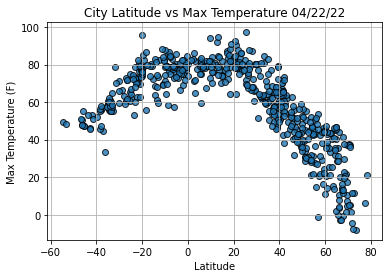

In [35]:
#extract relevent fields from the DataFrame for plotting

lats = city_data_df["Lat"]
lngs = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


import time

#get today's date in seconds

today = time.strftime("%x")

#build scatter plot for lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig1.png")

#show dat shit
plt.show()

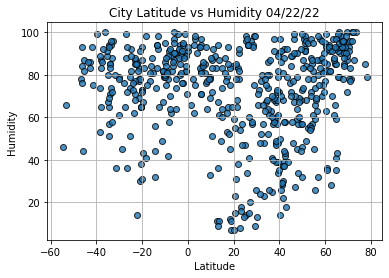

In [39]:
#build scatter plot for lat vs humidity

plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Humidity " + today)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig2.png")

#show dat shit
plt.show()

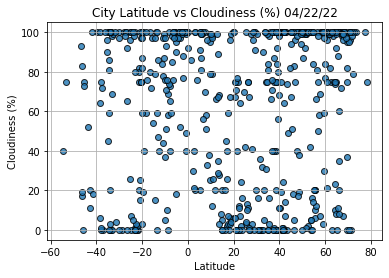

In [40]:
#build scatter plot for lat vs cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig3.png")

#show dat shit
plt.show()

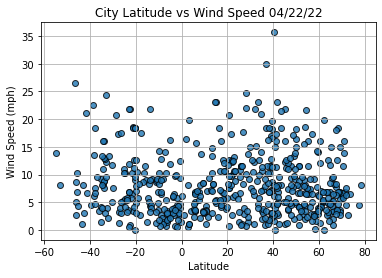

In [41]:
#build scatter plot for lat vs wind speed

plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig4.png")

#show dat shit
plt.show()